---

### Utilities  

- visualize a single image (이미지 하나만 출력)

In [32]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def vis_single(img_path):
     
     if img_path.exists():
          
          # define paths
          label = str(img_path.parent).split('\\')[-1]
          roi_path = (img_path.parents[2] / 'rois' / label / img_path.stem).with_suffix('.txt')
          crop_roi_path = (img_path.parents[2] / 'crop_rois' / label / img_path.stem).with_suffix('.txt')
          
          # img
          image = Image.open(img_path)
          
          #=============================================================================
          # plot
          fig, ax = plt.subplots()

          ttitle = img_path.stem
          plt.axis(False)
          plt.title(ttitle)
          ax.imshow(image)

          # roi (extension: .txt)
          if roi_path.exists():
               rois = []
               with open(roi_path, 'r') as f:
                    rois = [line.split() for line in f.readlines()]     # order: (label, x, y, w, h)
                    rois = np.array(rois, dtype=int)
               
               for roi in rois:
                    (left, top, w, h) = roi[1:]
                    ax.add_patch(
                         patches.Rectangle(
                         (left, top),                   # (x, y)
                         w, h,                          # width, height
                         linewidth = 2,
                         edgecolor = 'r',
                         facecolor = 'none',
                         ))
          
          # crop_roi
          if crop_roi_path != None and crop_roi_path.exists():
               rois = []
               with open(crop_roi_path, 'r') as f:
                    roi = [line.split() for line in f.readlines()][0]     # order: (label, x, y, w, h)
                    
               left=int(roi[0]); top=int(roi[1]); w=int(roi[2]); h=int(roi[3])  # crop_roi has no label info => so index range is 0~3
               ax.add_patch(
                    patches.Rectangle(
                         (left, top),       # (x, y)
                         w, h,              # width, height
                         linewidth = 1,
                         edgecolor = 'y',
                         facecolor = 'none',
                    ))
          plt.show()
     
     else: print("file doesn't exist")

- vis multiple images (여러 개 출력)

In [170]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def vis_multi(img_paths, original_compare=False):
   
   # roi_paths, crop_roi_paths=None
   
   cols=5
   rows = int(len(img_paths) / cols) + 1
   fig = plt.figure(figsize=(15, rows*2))
   
   for idx, img_path in enumerate(img_paths):
      label = str(img_path.parent).split('\\')[-1]
      
      if original_compare == True:
         img_path = Path(r'C:\workspace\datasets\EGD_최종검수\original\images') / label / img_path.name
         
      # define paths
      roi_path = (img_path.parents[2] / 'rois' / label / img_path.stem).with_suffix('.txt')
      crop_roi_path = (img_path.parents[2] / 'crop_rois' / label / img_path.stem).with_suffix('.txt')
      
      
      ax = fig.add_subplot(rows, cols, idx+1)        # objected-based API
      
      # 1) img
      img = Image.open(img_path)
      ax.imshow(img)
      ax.set_title(img_path.name, fontsize=8)
      ax.axis(False)
      
      # 2) roi
      if roi_path.exists():
         rois = []
         with open(roi_path, 'r') as f:
            rois = [line.split() for line in f.readlines()]     # [ [label, x, y, w, h], ... ]
            
         for roi in rois:
            left=int(roi[1]); top=int(roi[2]); w=int(roi[3]); h=int(roi[4])
            ax.add_patch(
               patches.Rectangle(
                  (left, top),       # (x, y)
                  w, h,              # width, height
                  linewidth = 2,
                  edgecolor = 'r',
                  facecolor = 'none',
               ))
      
      # 3) crop_roi
      if crop_roi_path!=None and crop_roi_path.exists():
         rois = []
         with open(crop_roi_path, 'r') as f:
            rois += [line.split() for line in f.readlines()]
            
         roi = rois[0]         
         left=int(roi[0]); top=int(roi[1]); w=int(roi[2]); h=int(roi[3])  # crop_roi has no label info => so index range is 0~3
         ax.add_patch(
            patches.Rectangle(
               (left, top),       # (x, y)
               w, h,              # width, height
               linewidth = 1,
               edgecolor = 'y',
               facecolor = 'none',
            ))
   plt.show()

visualize random images (여러 개 랜덤 출력)  

In [34]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from pathlib import Path

def vis_random(all_paths, base_dir, random_yn=True):
   '''
   - using example
   file_names = vis_random(all_paths, base_dir=base_dir)
   
   - all_paths
     it should be a dictionary
     e.g) {cancer:[img_path1, img_path2, ...],
            ulcer:[img_path1, img_path2, ...], ...}
     
   - cols: number of imgs you want to see per label 
   '''
   
   cols=5
   rows=len(all_paths)
   fig = plt.figure(figsize=(15, 10))
   cnt = 1
   
   # return: plot img paths
   return_file_paths = {i:[] for i in list(all_paths.keys())}
   
   if random_yn:
      # random indexes
      random_indices = {i:[] for i in list(all_paths.keys())}
      for idx, label in enumerate(list(all_paths.keys())):
         random_indices[label] += random.sample(range(len(all_paths[label][0])), cols)
   
   # plot
   for label in list(all_paths.keys()):
      if random_yn: 
         img_paths = np.array(all_paths[label][0])[ (random_indices[label]) ]   # tuple 형태로 넣어줌
      else:
         img_paths = [ base_dir / 'images' / label / img_path.name for img_path in all_paths[label]]
      
      return_file_paths[label] = img_paths
      
      for i in range(cols):
         
         ax = fig.add_subplot(rows, cols, cnt)        # objected-based API
         roi_path = Path((base_dir / 'rois' / label / img_paths[i].stem).with_suffix('.txt'))
         crop_roi_path = Path((base_dir / 'crop_rois' / label / img_paths[i].stem).with_suffix('.txt'))
         
         # 1) img
         img = Image.open(img_paths[i])
         ax.imshow(img)
         ax.set_title(f'{label}\n'+img_paths[i].name, fontsize=8)
         ax.axis(False)
         
         # 2) roi
         if roi_path.exists():
            rois = []
            with open(roi_path, 'r') as f:
               rois += [line.split() for line in f.readlines()]     # [ [label, x, y, w, h], ... ]
            for roi in rois:
               left=int(roi[1]); top=int(roi[2]); w=int(roi[3]); h=int(roi[4])
               ax.add_patch(
                  patches.Rectangle(
                     (left, top),       # (x, y)
                     w, h,              # width, height
                     linewidth = 2,
                     edgecolor = 'r',
                     facecolor = 'none',
                  ))
         
         # 3) crop_roi
         if crop_roi_path.exists():
            rois = []
            with open(crop_roi_path, 'r') as f:
               rois += [line.split() for line in f.readlines()]
            roi = rois[0]         
            left=int(roi[0]); top=int(roi[1]); w=int(roi[2]); h=int(roi[3])  # crop_roi has no label info => so index range is 0~3
            ax.add_patch(
               patches.Rectangle(
                  (left, top),       # (x, y)
                  w, h,              # width, height
                  linewidth = 1,
                  edgecolor = 'y',
                  facecolor = 'none',
               ))
         
         cnt += 1
   plt.show()
   
   return return_file_paths

---

# [Anlaysis]

# 1. Size analysis

In [183]:
# labels
CLASSES = ['cancer', 'ulcer', 'adenoma']  # excluded normal for analysis!!
CLASSES = dict((label, idx) for idx, label in enumerate(CLASSES))     # {'normal':0, ...}
NUM_CLASSES = len(CLASSES)

# dir
from pathlib import Path
base_dir = Path(r'C:\workspace\datasets\EGD_최종검수\cropped') # modify_here : define where to copy
img_dir = base_dir / "images"
roi_dir = base_dir / "rois"

all_paths = {i:[[], []] for i in CLASSES}

print('===== Extracting the original file paths =====')
for label in CLASSES:
     for idx, dir in enumerate([img_dir, roi_dir]):
          tmp_dir = dir / label
          all_paths[label][idx] = list(tmp_dir.glob('*'))
          
     print(f'{label}\t'+
           f'img: {len(all_paths[label][0])}\t'+
           f'roi: {len(all_paths[label][1])}')

===== Extracting the original file paths =====
cancer	img: 10414	roi: 10414
ulcer	img: 4415	roi: 4415
adenoma	img: 13603	roi: 13603


### 1) cropped Image Size

extract file paths

- Area (넓이 확인)  

min, max, ave

In [188]:
img_w_h = {i:[] for i in CLASSES}
img_area = {i:[] for i in CLASSES}
img_w_h_ratio = {i:[] for i in CLASSES}

In [189]:
from PIL import Image
import numpy as np

for label in CLASSES:
     # get img_paths
     img_paths = np.array(all_paths[label][0])
     
     for i, path in enumerate(img_paths):
          img = Image.open(path)
          img_w_h[label] += [[img.width, img.height]]
          
     # list to ndarray
     img_w_h[label] = np.array(img_w_h[label])
     
     # get w, h, ratio
     widths = img_w_h[label][:, 0]
     heights = img_w_h[label][:, 1]
     
     img_area[label] = widths * heights
     img_w_h_ratio[label] = np.round(widths / heights, 2)

In [191]:
# size based on area (면적 기준)
for label in CLASSES:
     print(label)
     print(f'max w,h: {img_w_h[label][img_area[label].argmax(), :]}\t' + 
          f'min w,h: {img_w_h[label][img_area[label].argmin(), :]}\n' +
          f'ave w,h: {np.average(img_w_h[label][0]):.2f}, {(np.average(img_w_h[label][1])):.2f}\n'
     )

cancer
max w,h: [1920 1080]	min w,h: [148 130]
ave w,h: 1120.50, 1120.50

ulcer
max w,h: [1245 1079]	min w,h: [472 407]
ave w,h: 1121.00, 1121.00

adenoma
max w,h: [1920 1080]	min w,h: [236 203]
ave w,h: 957.00, 957.00



Image width & height

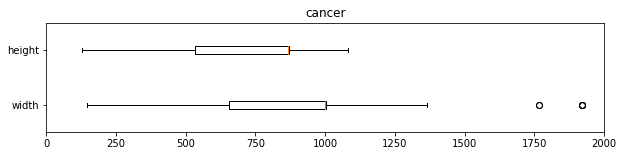

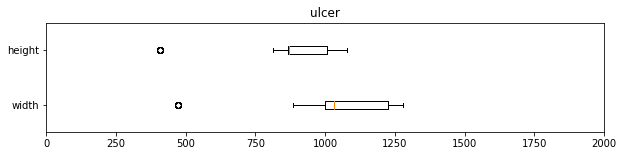

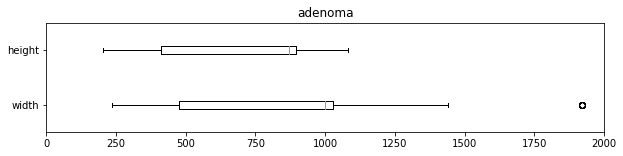

In [192]:
import matplotlib.pyplot as plt

for label in CLASSES:
     plt.figure(figsize=(10, 2))
     plt.boxplot([img_w_h[label][:, 0], img_w_h[label][:, 1]], vert=0)
     plt.yticks([1, 2], ['width', 'height'])
     plt.xlim([0, 2000])
     plt.title(label)
     plt.show()

▼ check the outliers

In [74]:
# outliers in ulcer width
tmp1 = np.array(all_paths['ulcer'][0])[img_w_h['ulcer'][:, 0] < 500]

# outliers in ulcer height
tmp2 = np.array(all_paths['ulcer'][0])[img_w_h['ulcer'][:, 0] < 500]

# outliers in adenoma width
tmp3 = np.array(all_paths['adenoma'][0])[img_w_h['adenoma'][:, 0] > 1750]

In [78]:
print(len(tmp1))
print(len(tmp2))
print(len(tmp3))
tmp3[0]

10
10
12


WindowsPath('C:/workspace/datasets/EGD_최종검수/cropped/images/adenoma/adenoma_09624.jpg')

I saw one of the outliers

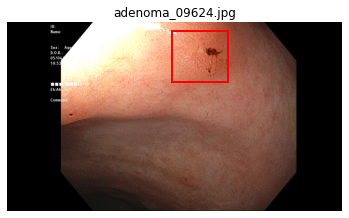

In [79]:
vis_single(Path('C:/workspace/datasets/EGD_최종검수/cropped/images/adenoma/adenoma_09624.jpg'),
           Path('C:/workspace/datasets/EGD_최종검수/cropped/rois/adenoma/adenoma_09624.txt'))

▲ It has no crop_roi file so it hasn't cropped and seemed like an outlier

- Ratio (w/h)
min, max, ave

cancer ratio(w/h)
max: 1.5, min: 0.95, ave: 1.17


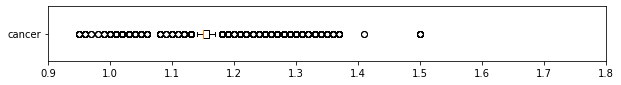

ulcer ratio(w/h)
max: 1.34, min: 0.99, ave: 1.18


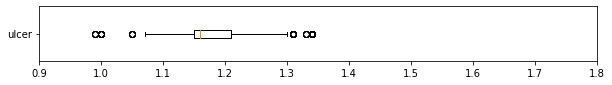

adenoma ratio(w/h)
max: 1.78, min: 0.95, ave: 1.16


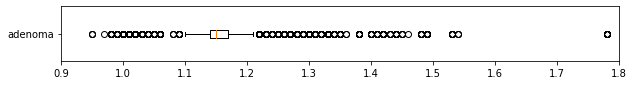

In [145]:
import matplotlib.pyplot as plt

for label in CLASSES:
     print(label, 'ratio(w/h)')
     print(f'max: {img_w_h_ratio[label][img_w_h_ratio[label].argmax()]}, '+
          f'min: {img_w_h_ratio[label][img_w_h_ratio[label].argmin()]}, '+
          f'ave: {round(np.average(img_w_h_ratio[label]), 2)}')
     
     plt.figure(figsize=(10, 1))
     plt.boxplot(img_w_h_ratio[label], vert=0)
     plt.yticks([1], [label])
     plt.xlim([0.9, 1.8])
     plt.show()

It seems there's no outlier

---

### 2) Ground Truth

In [193]:
import numpy as np
from PIL import Image

roi_w_h = {i:[] for i in CLASSES}
roi_area = {i:[] for i in CLASSES}
roi_w_h_ratio = {i:[] for i in CLASSES}

for label in CLASSES:
     roi_paths = np.array(all_paths[label][1])
     
     for idx, roi_path in enumerate(roi_paths):
          rois = []
          
          # open file
          with open(roi_path, 'r') as f:
               rois = [list(map(int, line.split())) for line in f.readlines()]  # str to int
          
          # rois
          for roi in rois:
               width = roi[3]
               height = roi[4]
               
               roi_w_h[label].append([width, height])
               roi_area[label].append(width*height)
               roi_w_h_ratio[label].append(width/height)
               
     roi_w_h[label] = np.array(roi_w_h[label])
     roi_area[label] = np.array(roi_area[label])
     roi_w_h_ratio[label] = np.array(roi_w_h_ratio[label])

In [194]:
# size based on area (면적 기준)
for label in CLASSES:
     print(label)
     print(f'max w,h: {roi_w_h[label][roi_area[label].argmax(), :]}\t' + 
          f'min w,h: {roi_w_h[label][roi_area[label].argmin(), :]}\n' +
          f'ave w,h: {np.average(roi_w_h[label][0]):.2f}, {(np.average(roi_w_h[label][1])):.2f}\n'
     )

cancer
max w,h: [1336 1079]	min w,h: [40 42]
ave w,h: 664.00, 664.50

ulcer
max w,h: [1245 1055]	min w,h: [92 40]
ave w,h: 358.50, 413.50

adenoma
max w,h: [1171  988]	min w,h: [27 16]
ave w,h: 183.00, 193.50



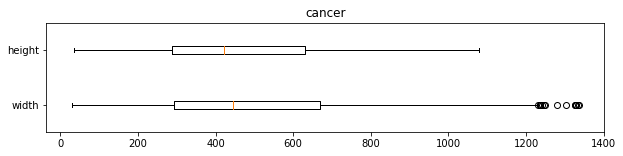

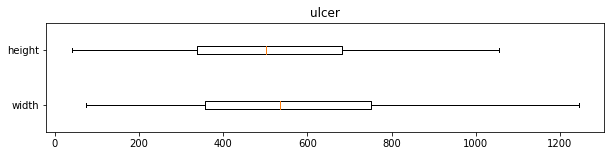

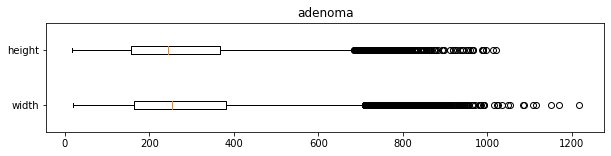

In [195]:
import matplotlib.pyplot as plt

for label in CLASSES:
     plt.figure(figsize=(10, 2))
     plt.boxplot([roi_w_h[label][:, 0], roi_w_h[label][:, 1]], vert=0)
     plt.yticks([1, 2], ['width', 'height'])
     #plt.xlim([-300, 1400])
     plt.title(label)
     plt.show()

cancer ratio
max: 5.64, min: 0.1, ave: 1.1


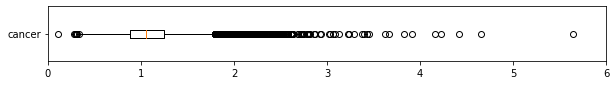

ulcer ratio
max: 4.48, min: 0.2, ave: 1.14


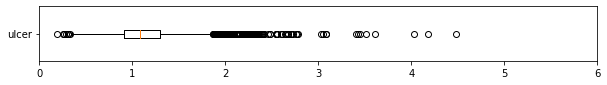

adenoma ratio
max: 5.69, min: 0.21, ave: 1.1


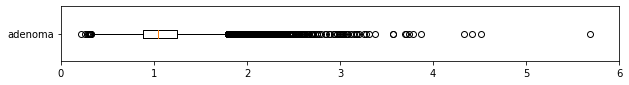

In [197]:
import matplotlib.pyplot as plt

for label in CLASSES:
     print(label, 'ratio')
     print(f'max: {round(roi_w_h_ratio[label][roi_w_h_ratio[label].argmax()], 2)}, '+
          f'min: {round(roi_w_h_ratio[label][roi_w_h_ratio[label].argmin()], 2)}, '+
          f'ave: {round(np.average(roi_w_h_ratio[label]), 2)}')
     
     plt.figure(figsize=(10, 1))
     plt.boxplot(roi_w_h_ratio[label], vert=0)
     plt.yticks([1], [label])
     plt.xlim([0., 6])
     plt.show()